In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
train_data=pd.read_csv('F:\\data_science\\dataquest\\train_DaEJRFg.csv')
test_data=pd.read_csv('F:\\data_science\\dataquest\\test_TQDFDgg.csv')
train_data.tail()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
11772,VIC20120001118366,23:15:02,13-06-2012,Sanjay Colony--Patel Nagar,Raipur,Multiple Vehicular Incident,4,3,CUR,HIW,HIL,0
11773,VIC20110000320257,00:15:02,03-03-2011,Shartradhar Crosing,Raipur,2 Wheeler accidents,1,2,CUR,HIW,AGL,0
11774,VIC20090001341524,20:52:35,18-07-2009,Ramsawala,Sahaspur,2 Wheeler accidents,25,22,INT,HIW,HOSP,0
11775,VIC20140000744614,06:51:15,23-06-2014,Majri Grant,Doiwala,Multiple Vehicular Incident,8,8,UNK,LOC,AGL,1
11776,VIC20100000952321,16:51:39,09-05-2010,Shimla Chowk,Raipur,Vehicle role over/Skid,8,3,INT,HIW,MAR,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 12 columns):
victim_id                     11777 non-null object
incident_time                 11777 non-null object
incident_date                 11777 non-null object
incident_location             11470 non-null object
incident_tehsil               11777 non-null object
cause_of_emergency            11777 non-null object
base_to_scene_distance        11777 non-null int64
scene_to_hospital_distance    11777 non-null int64
roadway_feature               11777 non-null object
road_type                     11777 non-null object
surrounding_area              11777 non-null object
criticality                   11777 non-null int64
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


There are some missing locations.


In [4]:
train_data.describe()

,base_to_scene_distance,scene_to_hospital_distance,criticality
count,11777.000000,11777.000000,11777.000000
mean,6.819648,7.628598,0.044324
std,5.920448,8.993419,0.205822
min,1.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000
50%,5.000000,5.000000,0.000000
75%,9.000000,10.000000,0.000000
max,89.000000,119.000000,1.000000


We can see that there is very less criticality frequency.

In [5]:
import seaborn as sns

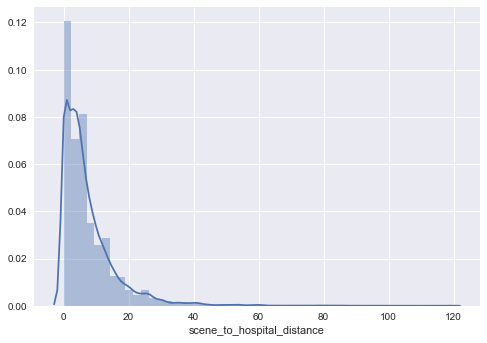

In [6]:
sns.distplot(train_data['scene_to_hospital_distance']);

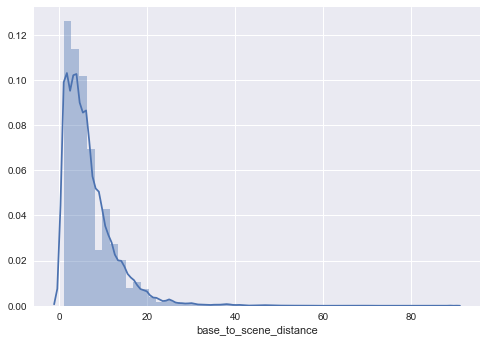

In [7]:
sns.distplot(train_data['base_to_scene_distance']);

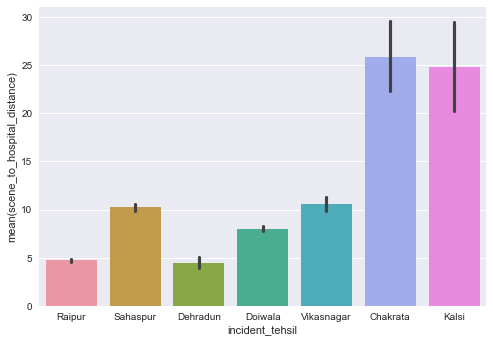

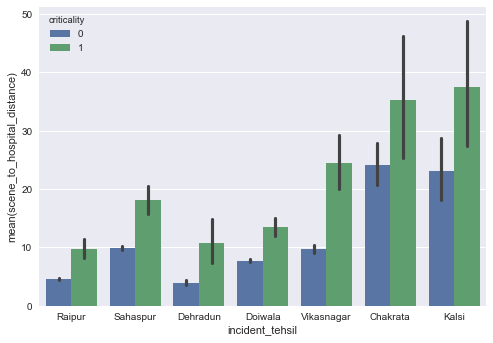

In [8]:
sns.barplot(x='incident_tehsil',y='scene_to_hospital_distance',hue=None,data=train_data);
plt.show()
sns.barplot(x='incident_tehsil',y='scene_to_hospital_distance',hue='criticality',data=train_data);

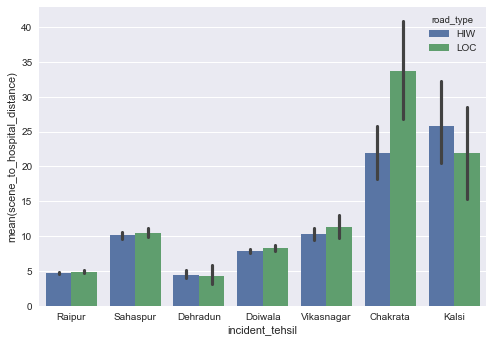

In [9]:
sns.barplot(x='incident_tehsil',y='scene_to_hospital_distance',hue='road_type',data=train_data);

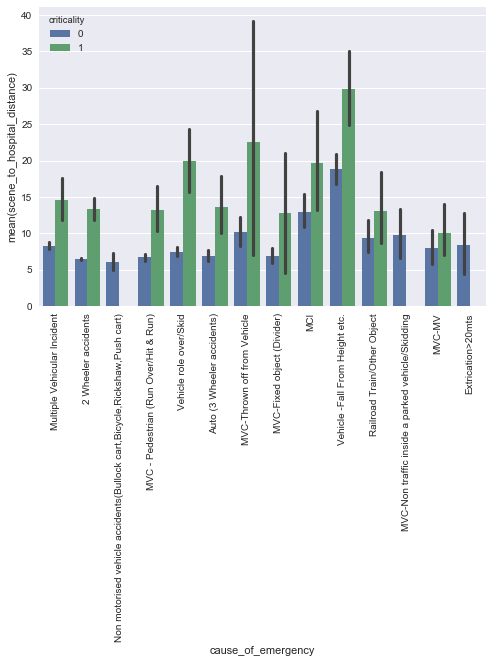

In [10]:
g=sns.barplot(x='cause_of_emergency',y='scene_to_hospital_distance',hue='criticality',data=train_data);
plt.xticks(rotation=90);

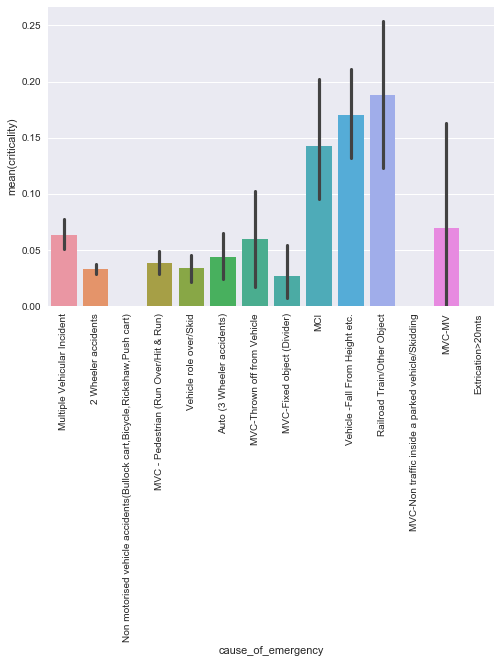

In [11]:
g=sns.barplot(x='cause_of_emergency',y='criticality',hue=None,data=train_data);
plt.xticks(rotation=90);

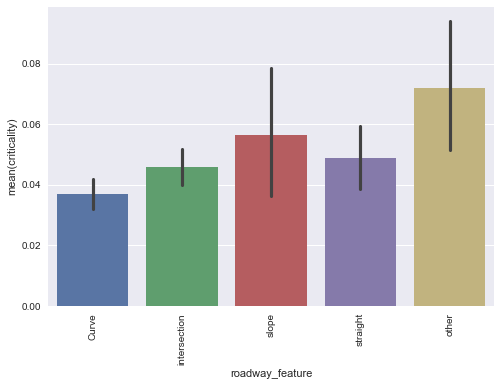

In [12]:
g=sns.barplot(x='roadway_feature',y='criticality',hue=None,data=train_data);
g.set_xticklabels(labels=['Curve','intersection','slope','straight','other'],rotation=90);

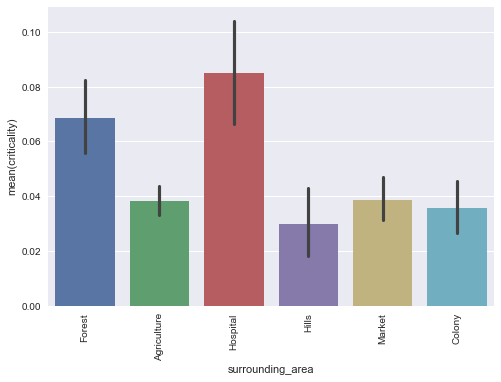

In [13]:
g=sns.barplot(x='surrounding_area',y='criticality',hue=None,data=train_data);
g.set_xticklabels(labels=['Forest','Agriculture','Hospital','Hills','Market','Colony'],rotation=90);

Surprisingly, hospital area has more critical accidents than other ones.

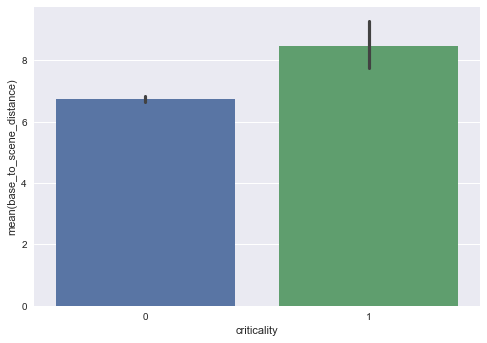

In [14]:
sns.barplot(x='criticality',y='base_to_scene_distance',hue=None,data=train_data);

### Time series analysis

In [15]:
count_data=train_data['criticality'].groupby(train_data['incident_date']).count()

In [16]:
count_data.head()

incident_date
01-01-2009     8
01-01-2010    10
01-01-2011    15
01-01-2012    11
01-01-2013     3
Name: criticality, dtype: int64

In [17]:
count_data.index=pd.to_datetime(count_data.index)

In [19]:
count_data=count_data.sort_index()

In [20]:
count_data.tail()

incident_date
2014-12-06    7
2014-12-07    7
2014-12-08    4
2014-12-09    2
2014-12-10    9
Name: criticality, dtype: int64

In [21]:
count_data.head()

incident_date
2009-01-01     8
2009-01-02    11
2009-01-03     5
2009-01-04     1
2009-01-05     3
Name: criticality, dtype: int64

In [25]:
train_data.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


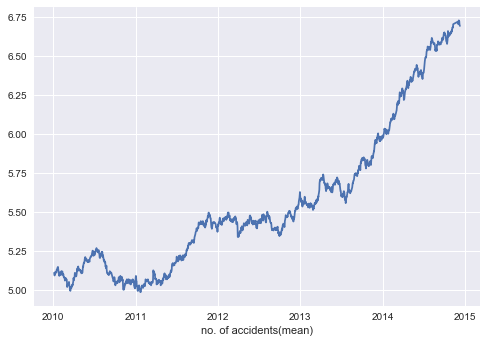

In [36]:
moving_avg=pd.Series.rolling(count_data,center=False,window=365).mean()
plt.plot(moving_avg);
plt.xlabel('no. of accidents(mean)');

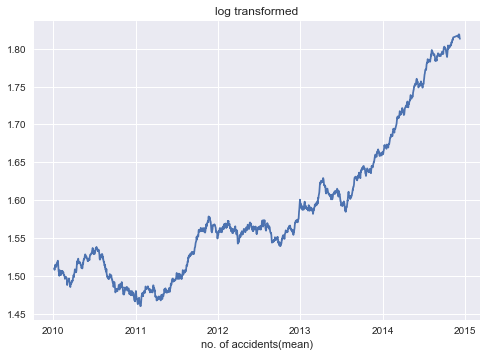

In [40]:
moving_avg=pd.Series.rolling(np.log(count_data),center=False,window=365).mean()
plt.plot(moving_avg);
plt.xlabel('no. of accidents(mean)');
plt.title('log transformed');

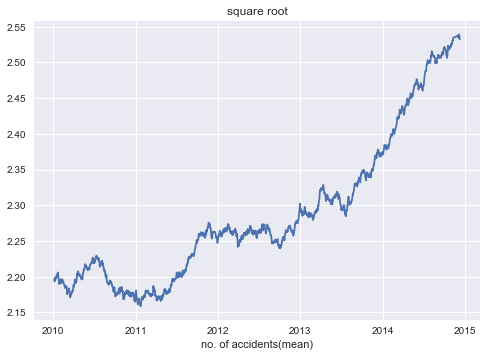

In [41]:
moving_avg=pd.Series.rolling(np.sqrt(count_data),center=False,window=365).mean()
plt.plot(moving_avg);
plt.xlabel('no. of accidents(mean)');
plt.title('square root');

In [42]:
ts_log=np.log(count_data)
moving_avg=pd.Series.rolling(np.log(count_data),center=False,window=365).mean()
ts_diff=ts_log-moving_avg

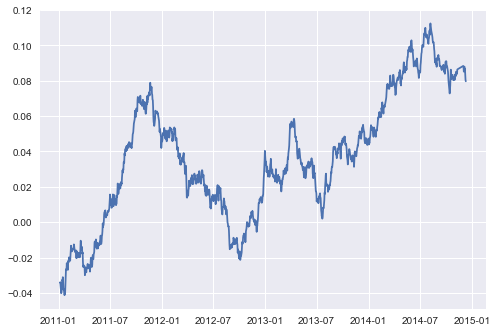

In [44]:
plt.plot(pd.Series.rolling(ts_diff,center=False,window=365).mean())

In [67]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [53]:
ts_diff.dropna(inplace=True)

In [65]:
test_stationarity(ts_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -37.067243
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1742.000000
Critical Value (10%)             -2.567654
Critical Value (5%)              -2.863201
Critical Value (1%)              -3.434109
dtype: float64


In [101]:
ts_diff1=ts_log - ts_log.shift()-ts_log.shift().shift()
ts_diff1.dropna(inplace=True)

In [102]:
test_stationarity(ts_diff1)

Results of Dickey-Fuller Test:
Test Statistic                  -22.015497
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    2100.000000
Critical Value (10%)             -2.567503
Critical Value (5%)              -2.862917
Critical Value (1%)              -3.433468
dtype: float64


In [70]:
from statsmodels.tsa.stattools import acf, pacf

In [110]:
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

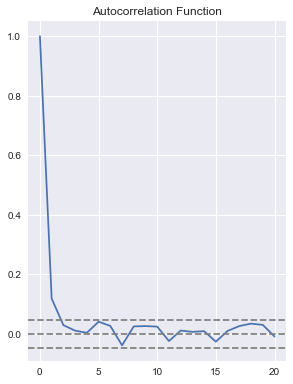

In [111]:
#Plot ACF:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

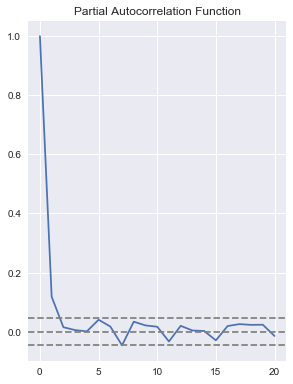

In [112]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [113]:
from statsmodels.tsa.arima_model import ARIMA

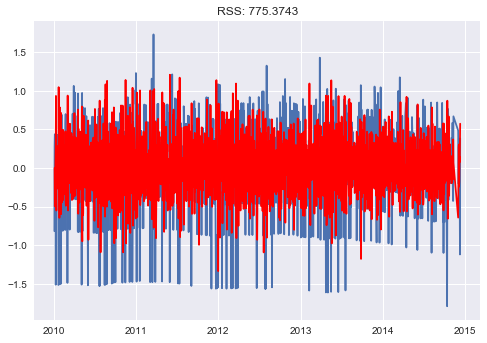

In [154]:
model = ARIMA(ts_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%np.sum((results_AR.fittedvalues-ts_diff)**2))

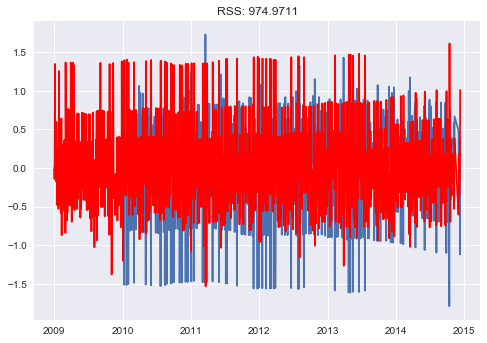

In [124]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.sum((results_MA.fittedvalues-ts_diff)**2))

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\Anaconda2\envs\py35\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


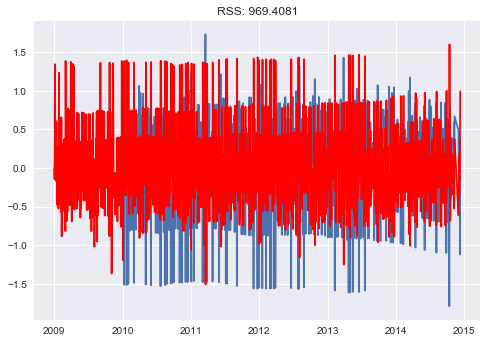

In [126]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.sum((results_ARIMA.fittedvalues-ts_diff)**2))

In [155]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print( predictions_AR_diff.head())

incident_date
2010-01-05    0.000035
2010-01-06   -0.494135
2010-01-07   -0.424740
2010-01-08   -0.046566
2010-01-09    0.093550
dtype: float64


In [156]:
len(ts_diff)

1743

In [158]:
ts_diff

incident_date
2010-01-04   -0.816981
2010-01-05    0.282420
2010-01-06    0.437809
2010-01-07    0.436887
2010-01-08    0.277827
2010-01-09   -0.128426
2010-01-10   -1.511710
2010-01-11   -0.125416
2010-01-12    0.097116
2010-01-13    0.097116
2010-01-14    0.278938
2010-01-15    0.429657
2010-01-16   -0.129959
2010-01-17    0.092573
2010-01-18    0.429045
2010-01-19    0.426724
2010-01-20    0.272074
2010-01-21    0.271574
2010-01-22   -1.515776
2010-01-23   -1.511366
2010-01-24   -1.506035
2010-01-25   -0.406635
2010-01-26    0.105479
2010-01-27   -1.500161
2010-01-28    0.288588
2010-01-29    0.101857
2010-01-30   -0.812534
2010-01-31    0.284967
2010-02-01   -1.502994
2010-02-02    0.442494
                ...   
2014-10-22    0.278141
2014-10-23    0.393702
2014-10-24   -0.194696
2014-10-25   -0.193774
2014-10-26   -0.011952
2014-10-27   -0.192986
2014-10-28    0.143064
2014-10-29   -0.012986
2014-10-30   -0.195919
2014-10-31   -0.195419
2014-11-01    0.141053
2014-11-02    0.1376

In [159]:
predictions_AR_diff

incident_date
2010-01-05    0.000035
2010-01-06   -0.494135
2010-01-07   -0.424740
2010-01-08   -0.046566
2010-01-09    0.093550
2010-01-10    0.286404
2010-01-11    0.933952
2010-01-12   -0.392318
2010-01-13   -0.551178
2010-01-14   -0.067489
2010-01-15   -0.106475
2010-01-16   -0.143446
2010-01-17    0.282227
2010-01-18    0.039558
2010-01-19   -0.264650
2010-01-20   -0.100719
2010-01-21    0.091391
2010-01-22    0.047308
2010-01-23    1.047542
2010-01-24    0.540083
2010-01-25   -0.004396
2010-01-26   -0.645762
2010-01-27   -0.633768
2010-01-28    0.785449
2010-01-29   -0.560640
2010-01-30   -0.433541
2010-01-31    0.592555
2010-02-01   -0.365441
2010-02-02    0.714571
2010-02-03   -0.597135
                ...   
2014-10-22   -0.359550
2014-10-23   -0.053844
2014-10-24   -0.032157
2014-10-25    0.309765
2014-10-26    0.178151
2014-10-27   -0.106755
2014-10-28    0.050949
2014-10-29   -0.141889
2014-10-30   -0.010511
2014-10-31    0.154632
2014-11-01    0.055308
2014-11-02   -0.1972

In [138]:
len(moving_avg[1:])

2106

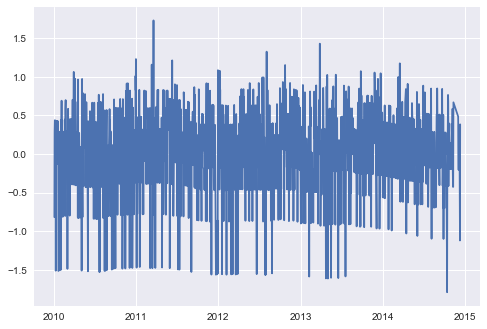

In [139]:
plt.plot(ts_diff)

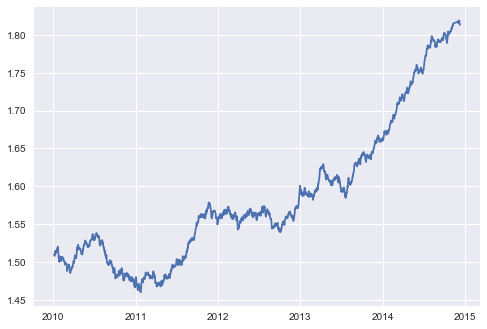

In [140]:
plt.plot(moving_avg)

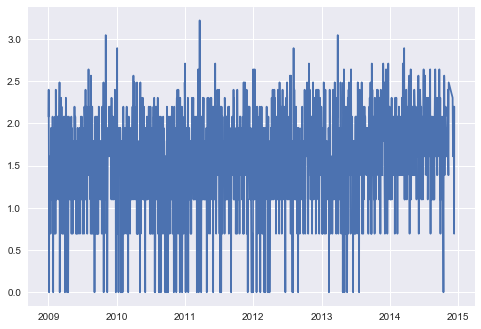

In [142]:
plt.plot(ts_log)

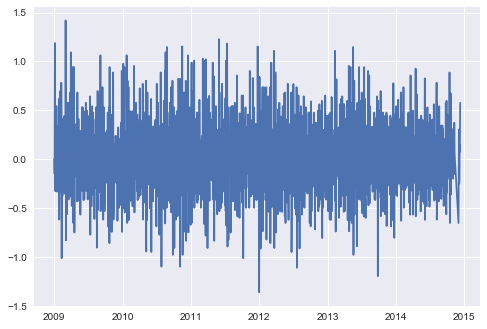

In [143]:
plt.plot(predictions_AR_diff)

In [145]:
len(ts_diff)

1743

In [148]:
len(ts_log[:364])

364

In [149]:
predictions_AR_diff

incident_date
2009-01-02   -0.000241
2009-01-03   -0.146006
2009-01-04    0.372679
2009-01-05    1.187925
2009-01-06   -0.174570
2009-01-07   -0.326350
2009-01-08   -0.171068
2009-01-10   -0.085794
2009-01-11   -0.132793
2009-01-12   -0.066650
2009-01-13    0.542958
2009-01-14   -0.139722
2009-01-15   -0.206072
2009-01-16   -0.332341
2009-01-17    0.336036
2009-01-18   -0.052061
2009-01-19   -0.151988
2009-01-20   -0.000456
2009-01-21   -0.000456
2009-01-22   -0.200004
2009-01-23    0.231617
2009-01-24   -0.245527
2009-01-25    0.205004
2009-01-26    0.616238
2009-01-27    0.616238
2009-01-28   -0.616993
2009-01-29   -0.411689
2009-01-30   -0.000456
2009-01-31   -0.240920
2009-02-01   -0.212154
                ...   
2014-10-22   -0.361198
2014-10-23   -0.050882
2014-10-24   -0.035369
2014-10-25    0.313197
2014-10-26    0.173906
2014-10-27   -0.108583
2014-10-28    0.053587
2014-10-29   -0.145919
2014-10-30   -0.008847
2014-10-31    0.153399
2014-11-01    0.053628
2014-11-02   -0.2000

In [150]:
len(predictions_AR_diff)

2106

In [151]:
test_stationarity(predictions_AR_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.573309e+01
p-value                        1.282369e-28
#Lags Used                     2.500000e+01
Number of Observations Used    2.080000e+03
Critical Value (10%)          -2.567510e+00
Critical Value (5%)           -2.862931e+00
Critical Value (1%)           -3.433498e+00
dtype: float64


In [160]:
count_data

incident_date
2009-01-01     8
2009-01-02    11
2009-01-03     5
2009-01-04     1
2009-01-05     3
2009-01-06     3
2009-01-07     4
2009-01-08     4
2009-01-10     5
2009-01-11     5
2009-01-12     2
2009-01-13     4
2009-01-14     4
2009-01-15     7
2009-01-16     3
2009-01-17     5
2009-01-18     5
2009-01-19     5
2009-01-20     5
2009-01-21     7
2009-01-22     4
2009-01-23     8
2009-01-24     4
2009-01-25     2
2009-01-26     1
2009-01-27     4
2009-01-28     4
2009-01-29     4
2009-01-30     6
2009-01-31     7
              ..
2014-10-22     8
2014-10-23     9
2014-10-24     5
2014-10-25     5
2014-10-26     6
2014-10-27     5
2014-10-28     7
2014-10-29     6
2014-10-30     5
2014-10-31     5
2014-11-01     7
2014-11-02     7
2014-11-03     8
2014-11-04     9
2014-11-05     8
2014-11-06    11
2014-11-07     5
2014-11-08     4
2014-11-09     4
2014-11-10    12
2014-12-01    10
2014-12-02     7
2014-12-03     5
2014-12-04     9
2014-12-05     9
2014-12-06     7
2014-12-07     7


In [161]:


train_data=pd.read_csv('F:\\data_science\\dataquest\\train_DaEJRFg.csv')
test_data=pd.read_csv('F:\\data_science\\dataquest\\test_TQDFDgg.csv')

d=train_data['incident_date']+' '+train_data['incident_time']
d1=test_data['incident_date']+' '+test_data['incident_time']
d=pd.to_datetime(d)
d1=pd.to_datetime(d1)

del train_data['incident_date']
del train_data['incident_time']
del test_data['incident_date']
del test_data['incident_time']
train_data['datetime']=d
test_data['datetime']=d1

train_data['hour_of_accident']=train_data['datetime'].dt.hour
test_data['hour_of_accident']=test_data['datetime'].dt.hour

train_data['weekday']=train_data['datetime'].dt.dayofweek
test_data['weekday']=test_data['datetime'].dt.dayofweek


d=train_data['criticality'].groupby(train_data['incident_location']).count().sort_values()[-20:].index
lst=[]
for i in train_data['incident_location']:
    if i in d:
        lst.append(i)
    else:
        lst.append('other')
lst2=[]
for i in test_data['incident_location']:
    if i in d:
        lst2.append(i)
    else:
        lst2.append('other')

del train_data['incident_location']
del test_data['incident_location']
train_data['incident_location']=lst
test_data['incident_location']=lst2

del train_data['road_type']
del test_data['road_type']

categorical_variables=[x for x in train_data.columns if train_data[x].dtypes=='O' and x not in ['victim_id','datetime']]
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
encoded_train_data=pd.DataFrame(data=train_data,copy=True)
encoded_test_data=pd.DataFrame(data=test_data,copy=True)
encoded_train_data[categorical_variables] =encoded_train_data[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))
encoded_test_data[categorical_variables] =encoded_test_data[categorical_variables].apply(lambda x: d[x.name].transform(x))

independent_variables=[x for x in train_data.columns if x not in ['victim_id','datetime','criticality']]
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
def scorer(estimator,X,y):
    y1=np.array(estimator.predict(X))
    score=roc_auc_score(y,y1)
    return score

from sklearn.ensemble import AdaBoostClassifier

adam=AdaBoostClassifier(learning_rate=2,n_estimators=48,random_state=0)

adam.fit(encoded_train_data[independent_variables],encoded_train_data['criticality'])
test_predictions=adam.predict(encoded_test_data[independent_variables])
victim_id=test_data['victim_id']
submission=pd.DataFrame({
    'victim_id':victim_id,
    'criticality': test_predictions
})
submission.to_csv('dataquest_submission4.csv', index=False)
